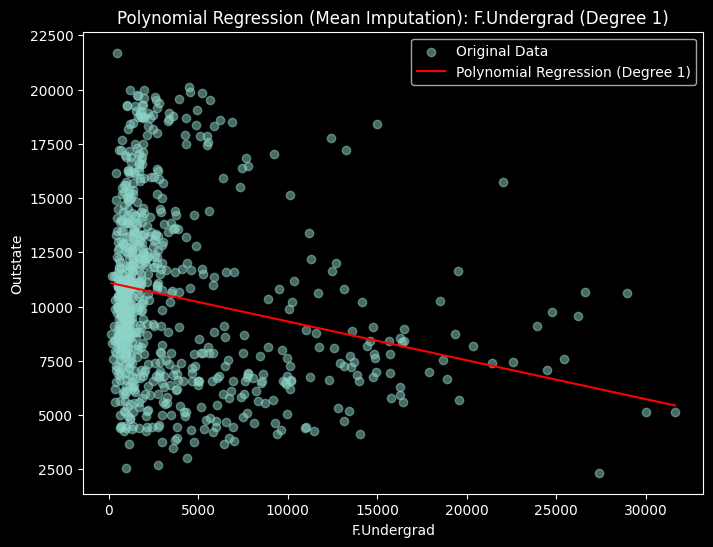

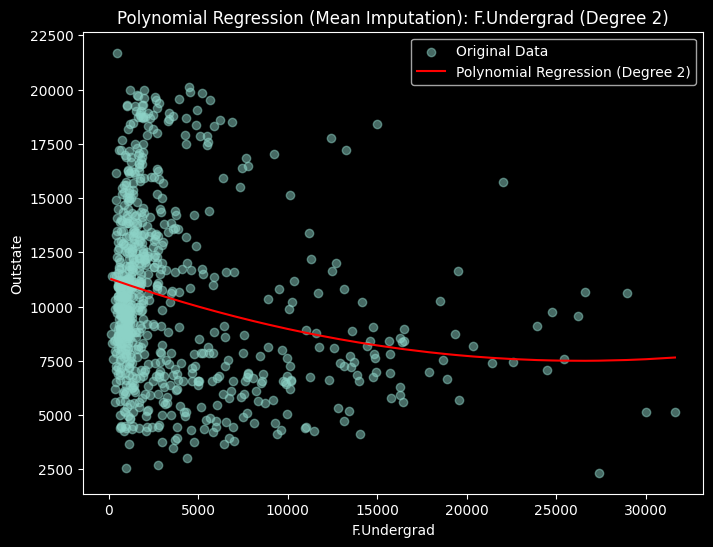

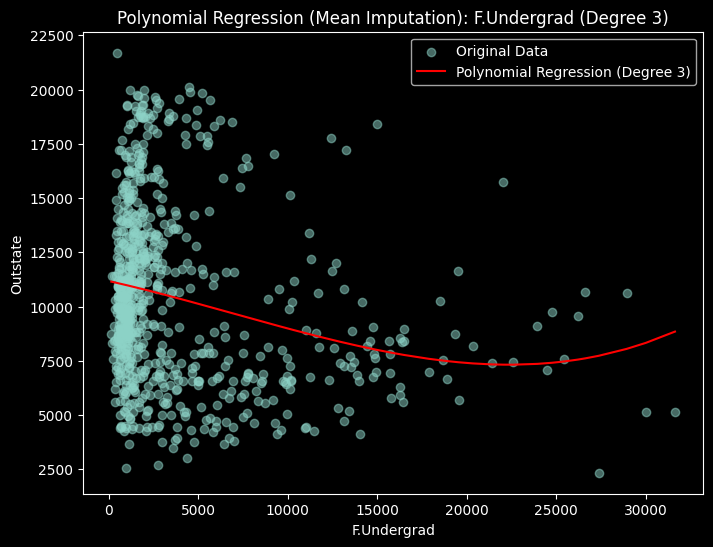

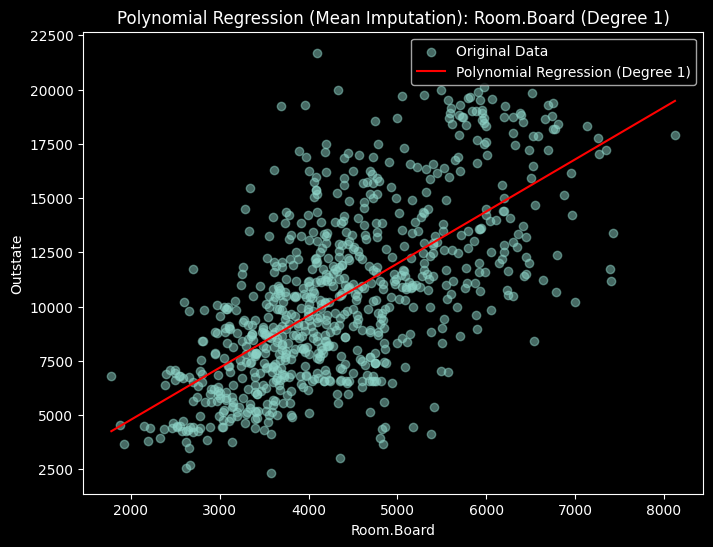

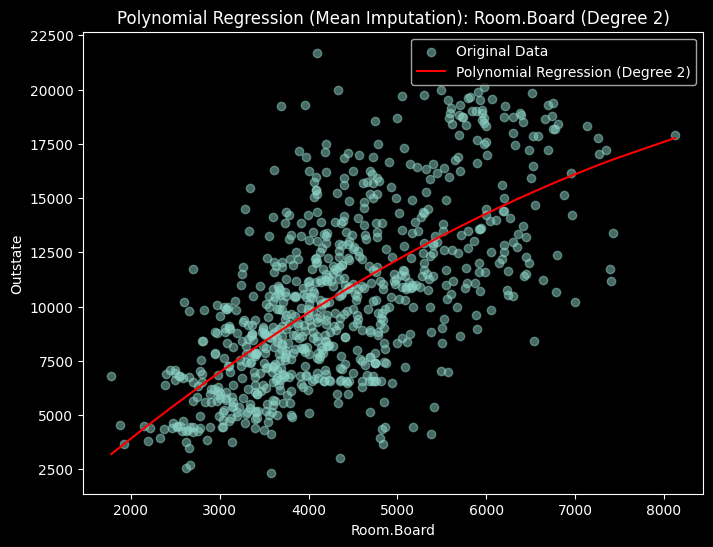

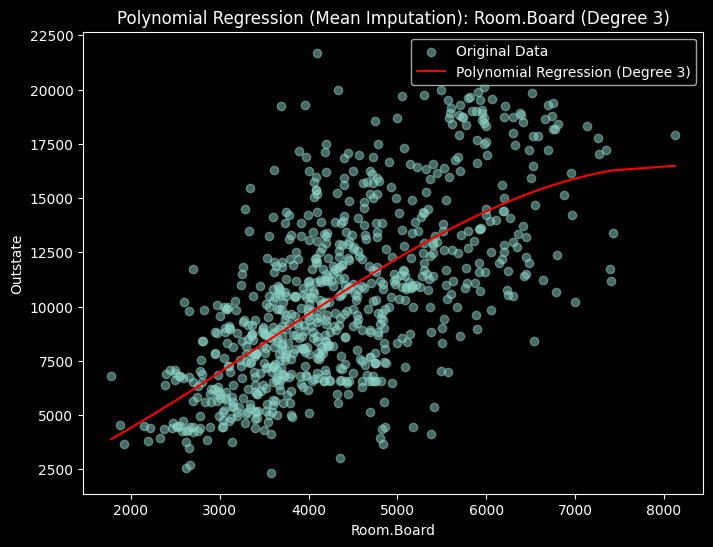

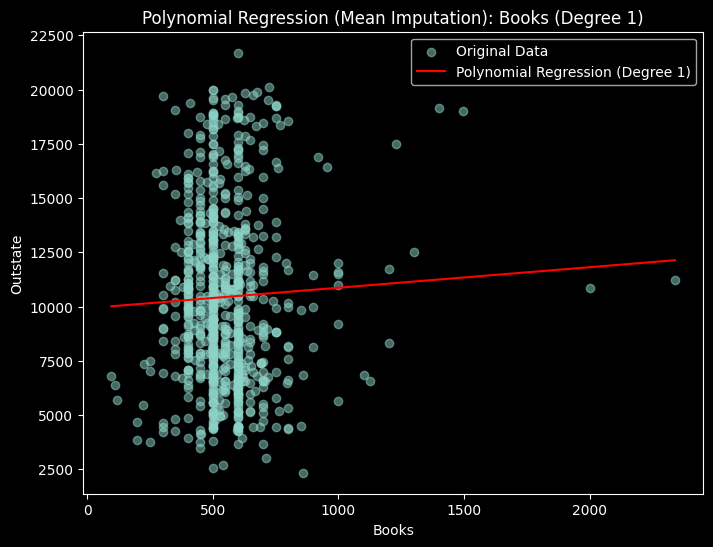

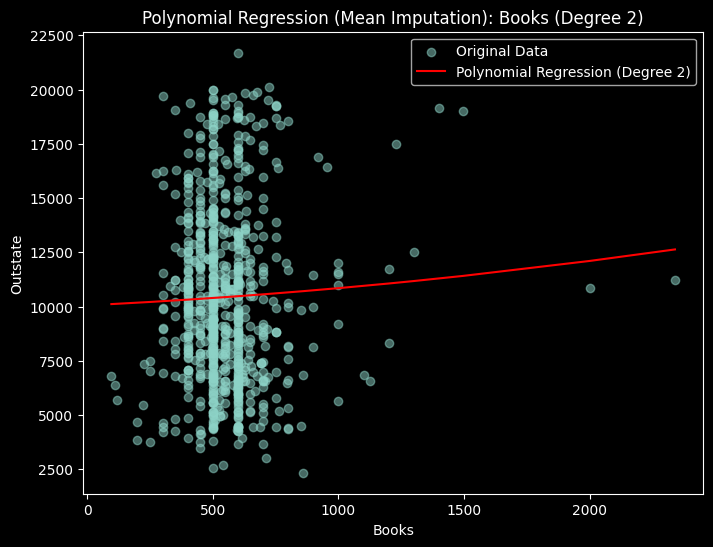

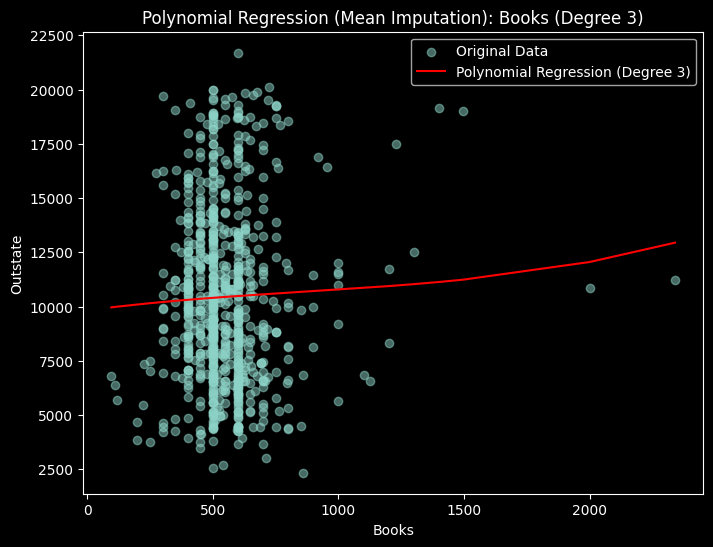

All Results (Mean Imputation):
      variable  degree           mse        r2
5   Room.Board       3  9.179163e+06  0.432117
4   Room.Board       2  9.189921e+06  0.431452
3   Room.Board       1  9.244880e+06  0.428051
2  F.Undergrad       3  1.535409e+07  0.050096
1  F.Undergrad       2  1.536448e+07  0.049453
0  F.Undergrad       1  1.541149e+07  0.046545
8        Books       3  1.613816e+07  0.001589
7        Books       2  1.613872e+07  0.001554
6        Books       1  1.613943e+07  0.001510


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv("College.csv")

# 비수치형 데이터 제거
data_numeric = data.select_dtypes(include=[np.number])

# 결측값 대체 (평균 대체)
mean_imputer = SimpleImputer(strategy="mean")
data_imputed_mean = pd.DataFrame(
    mean_imputer.fit_transform(data_numeric), columns=data_numeric.columns
)

# 독립 변수와 종속 변수 설정
target = "Outstate"
independent_vars = ["F.Undergrad", "Room.Board", "Books"]  # 주요 변수만 선택

# 결과 저장
results = []

# 주요 변수와 낮은 차수만 사용
for var in independent_vars:  # 주요 독립 변수만 사용
    X = data_imputed_mean[[var]].values
    y = data_imputed_mean[target].values

    for degree in range(1, 4):  # 다항식 차수 1~3만 사용
        # 다항 회귀
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)

        # 성능 평가
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)  # 정확한 계산 후 저장

        # 결과 저장
        results.append({"variable": var, "degree": degree, "mse": mse, "r2": r2})

        # 그래프 생성
        plt.figure(figsize=(8, 6))
        plt.scatter(X, y, alpha=0.5, label="Original Data")
        plt.plot(
            np.sort(X.flatten()),
            model.predict(poly.transform(np.sort(X, axis=0))),
            label=f"Polynomial Regression (Degree {degree})",
            color="red",
        )
        plt.xlabel(var)
        plt.ylabel(target)
        plt.title(f"Polynomial Regression (Mean Imputation): {var} (Degree {degree})")
        plt.legend()
        plt.show()

# 결과를 DataFrame으로 정리
results_df = pd.DataFrame(results)

# 모든 결과 출력
print("All Results (Mean Imputation):")
print(results_df.sort_values(by="r2", ascending=False))

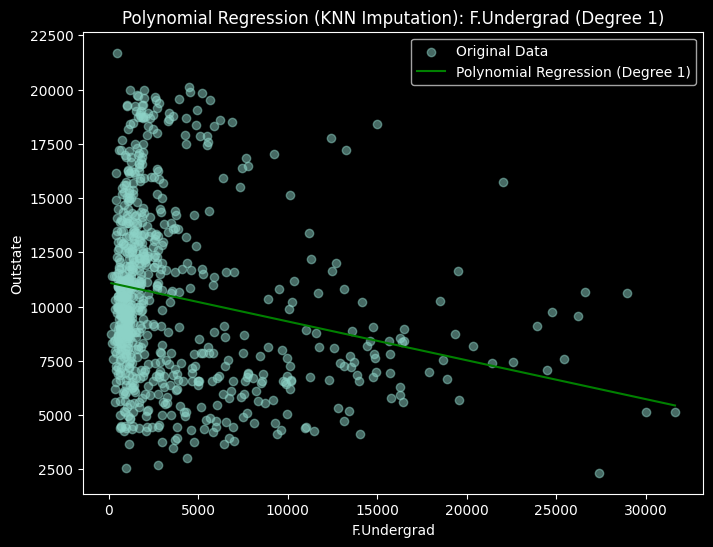

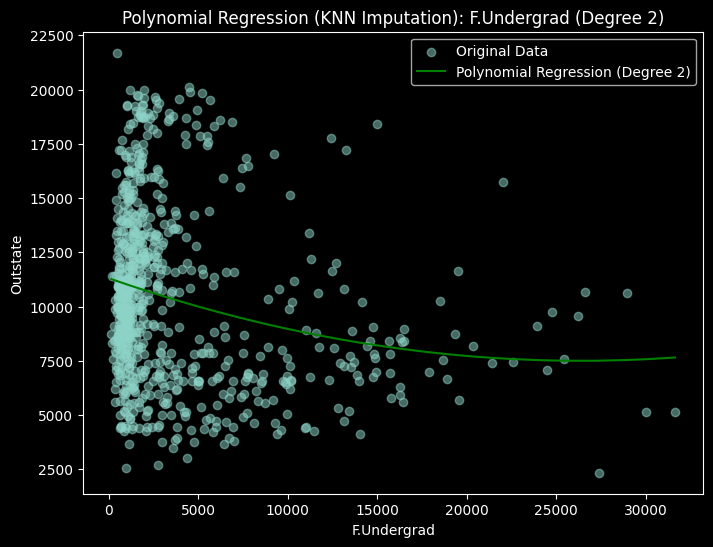

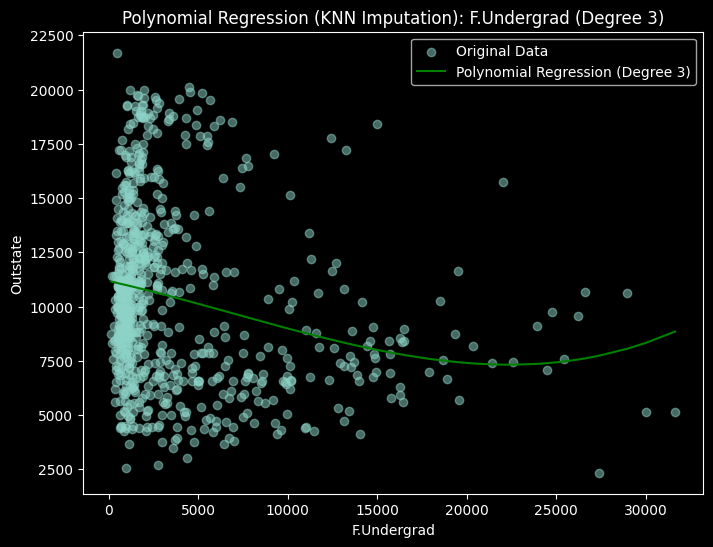

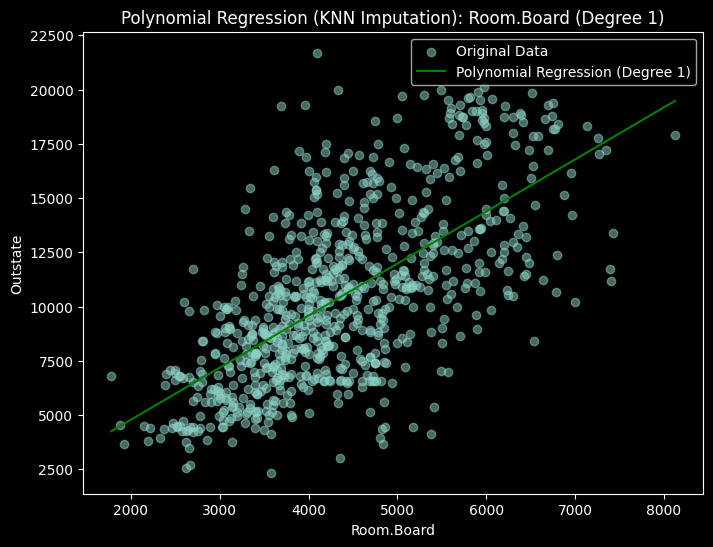

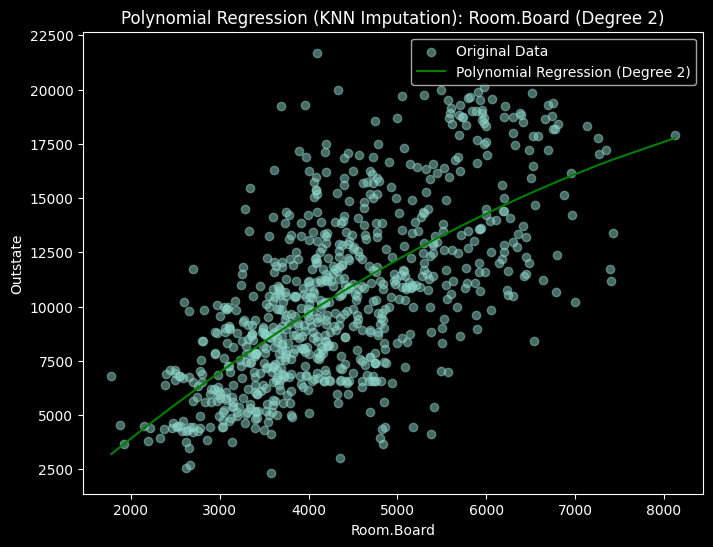

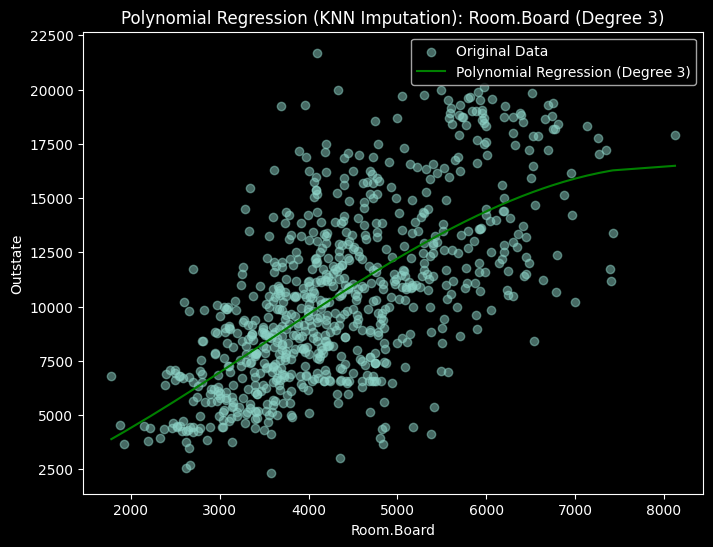

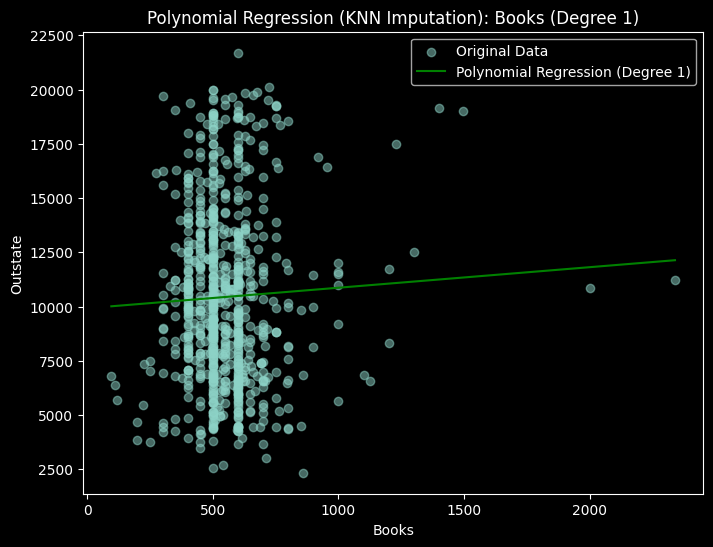

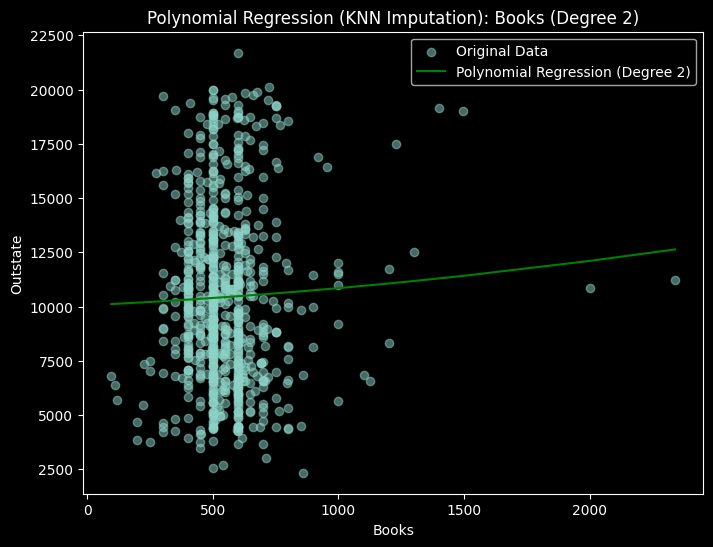

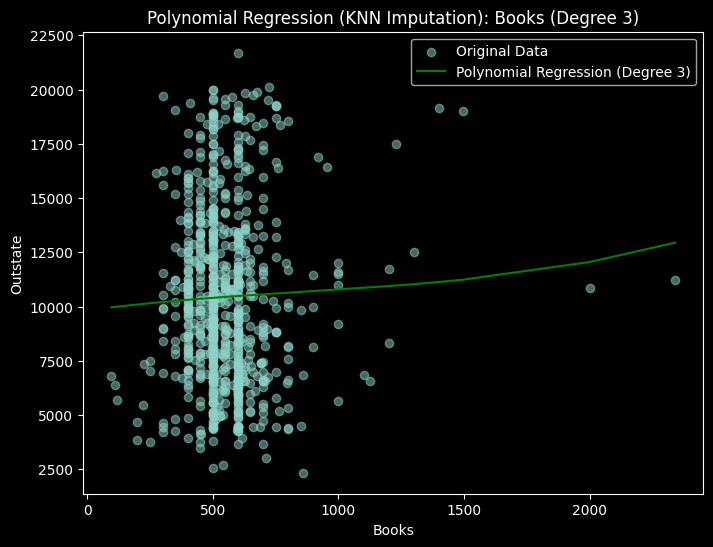

All Results (KNN Imputation):
      variable  degree           mse        r2
5   Room.Board       3  9.179163e+06  0.432117
4   Room.Board       2  9.189921e+06  0.431452
3   Room.Board       1  9.244880e+06  0.428051
2  F.Undergrad       3  1.535409e+07  0.050096
1  F.Undergrad       2  1.536448e+07  0.049453
0  F.Undergrad       1  1.541149e+07  0.046545
8        Books       3  1.613816e+07  0.001589
7        Books       2  1.613872e+07  0.001554
6        Books       1  1.613943e+07  0.001510


In [ ]:
from sklearn.impute import KNNImputer

# 비수치형 데이터 제거
data_numeric = data.select_dtypes(include=[np.number])

# 결측값 대체 (KNN 대체)
knn_imputer = KNNImputer(n_neighbors=5)
data_imputed_knn = pd.DataFrame(
    knn_imputer.fit_transform(data_numeric), columns=data_numeric.columns
)

# 독립 변수와 종속 변수 설정
target = "Outstate"
independent_vars = ["F.Undergrad", "Room.Board", "Books"]  # 주요 변수만 선택

# 결과 저장
results = []

# 주요 변수와 낮은 차수만 사용
for var in independent_vars:  # 주요 독립 변수만 사용
    X = data_imputed_knn[[var]].values
    y = data_imputed_knn[target].values

    for degree in range(1, 4):  # 다항식 차수 1~3만 사용
        # 다항 회귀
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)

        # 성능 평가
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)  # 정확한 계산 후 저장

        # 결과 저장
        results.append({"variable": var, "degree": degree, "mse": mse, "r2": r2})

        # 그래프 생성
        plt.figure(figsize=(8, 6))
        plt.scatter(X, y, alpha=0.5, label="Original Data")
        plt.plot(
            np.sort(X.flatten()),
            model.predict(poly.transform(np.sort(X, axis=0))),
            label=f"Polynomial Regression (Degree {degree})",
            color="green",
        )
        plt.xlabel(var)
        plt.ylabel(target)
        plt.title(f"Polynomial Regression (KNN Imputation): {var} (Degree {degree})")
        plt.legend()
        plt.show()

# 결과를 DataFrame으로 정리
results_df = pd.DataFrame(results)

# 모든 결과 출력
print("All Results (KNN Imputation):")
print(results_df.sort_values(by="r2", ascending=False))